In [1]:
#import common modules
import numpy as np
from sklearn.model_selection import train_test_split

#import own modules
from source.matrix_creation import polynomial_features
from source.plotting_exploration import plot_bias_variance_tradeoff_polynomial_degree, plot_bias_variance_tradeoff_datapoints
from source.plotting_exploration import plot_bias_variance_tradeoff_datapoints_sklearn, plot_bias_variance_tradeoff_polynomial_degree_sklearn


## Notebook for assignment 1 part g bias-variance

Generating analysis plots for assignement 1 part g bias-variance. 

* Functions for the main methods can be found in source/main_methods.py
* Functions for calculating errors can be found in source/errors.py
* Functions for plotting and exploration can be found in source/plotting_exploration.py


### Generate Runge's function data

In [2]:
# define the test and train dataset here, because using a very high polynomial degree (not needed for the other plots)
use_intercept = True # changed to variable to easily switch between True and False
np.random.seed(350)
# using noisy data
x_noise = np.linspace(-1, 1, num=1000)
y_noise = (1 / (1 + 25 * x_noise**2)) + np.random.normal(0, 0.1, size=x_noise.size)
p = 65 # polynomial degrees
X_noise = polynomial_features(x_noise, p, intercept=use_intercept)
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise, y_noise, random_state=1, test_size=0.2)

### Analysis

#### Own results

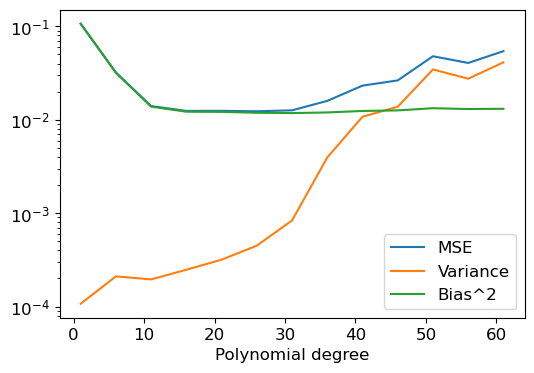

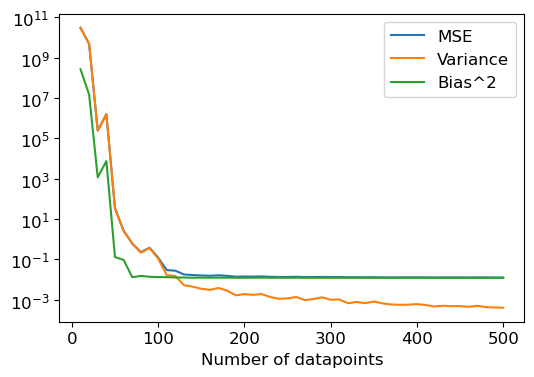

In [3]:
# BIAS-VARIANCE TRADEOFF 
# with different polynomial degrees
plot_bias_variance_tradeoff_polynomial_degree(X_train_noise, y_train_noise, X_test_noise, y_test_noise, use_intercept=True)

# with different data points
plot_bias_variance_tradeoff_datapoints(X_train_noise, y_train_noise, X_test_noise, y_test_noise)

#### Comparison with Sklearn

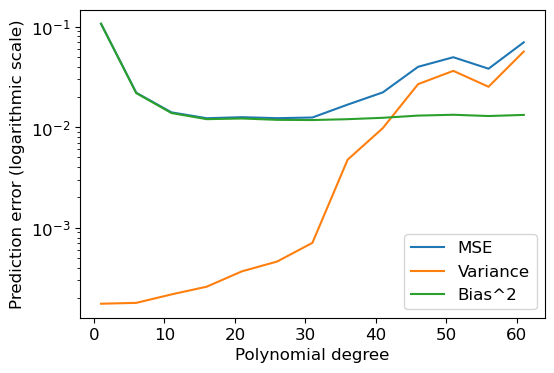

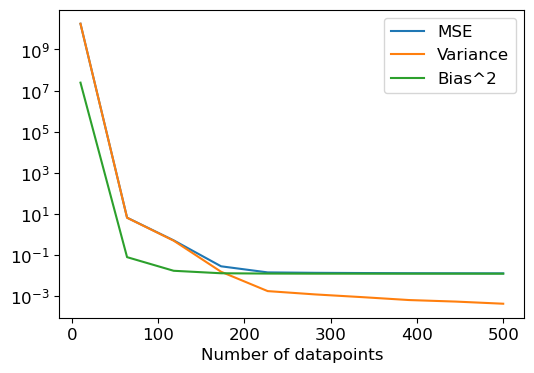

In [4]:
plot_bias_variance_tradeoff_polynomial_degree_sklearn(x_noise, y_noise, p=p) # with changing polynomial degree
plot_bias_variance_tradeoff_datapoints_sklearn(x_noise, y_noise) # with changing data points